In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='extracurricular_participation', ylabel='Count'>

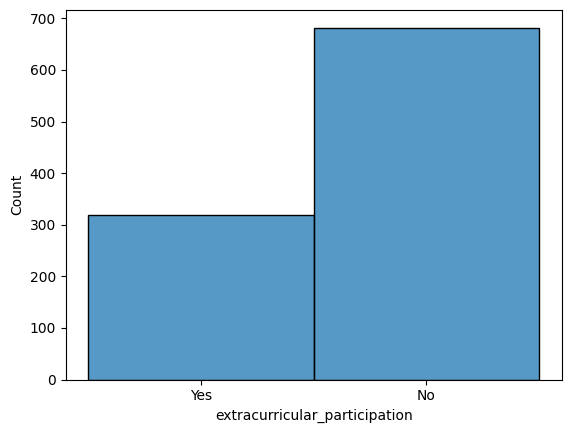

In [5]:
sns.histplot(data=df, x='extracurricular_participation')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


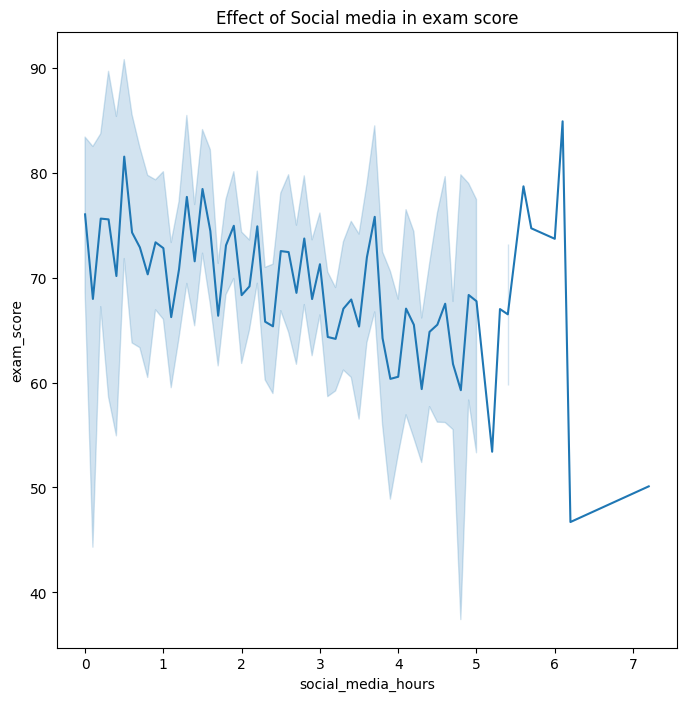

In [6]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df, x='social_media_hours', y='exam_score')
plt.title('Effect of Social media in exam score')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


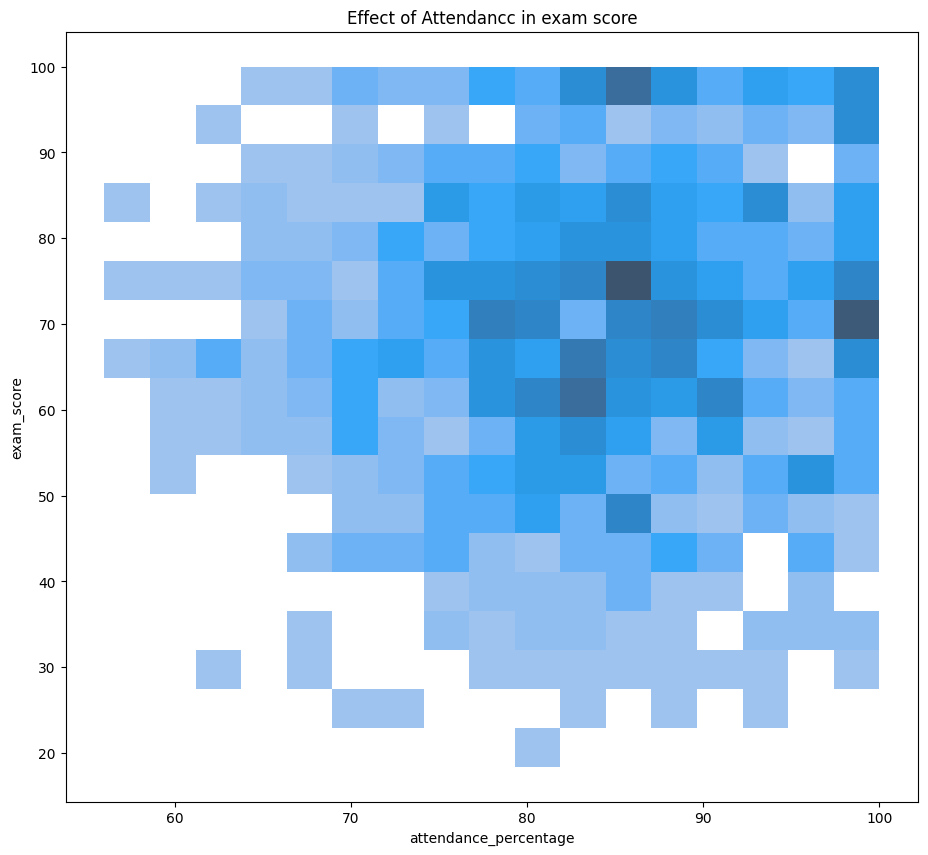

In [7]:
plt.figure(figsize=(11,10))
sns.histplot(data=df, x='attendance_percentage', y='exam_score')
plt.title('Effect of Attendancc in exam score')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


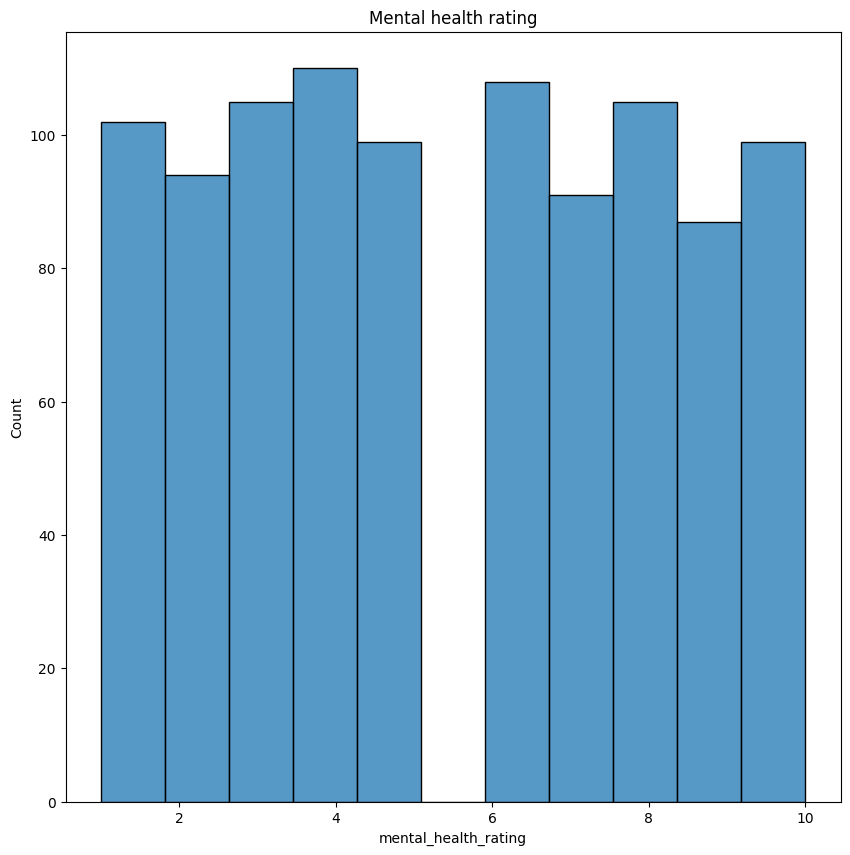

In [8]:
plt.figure(figsize=(10, 10))
sns.histplot(df, x='mental_health_rating')
plt.title('Mental health rating')
plt.show()

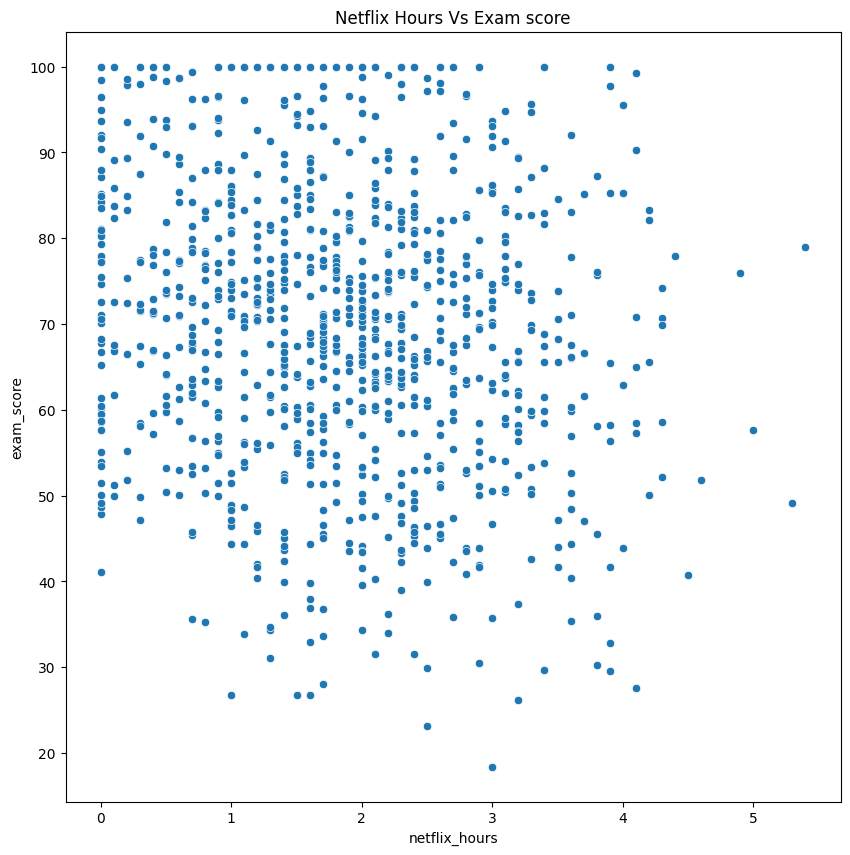

In [9]:

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='netflix_hours', y='exam_score')
plt.title('Netflix Hours Vs Exam score')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [11]:
df['gender'] = encoder.fit_transform(df['gender'])
df['part_time_job'] = encoder.fit_transform(df['part_time_job'])
df['diet_quality'] = encoder.fit_transform(df['diet_quality'])
df['internet_quality'] = encoder.fit_transform(df['internet_quality'])
df['extracurricular_participation'] = encoder.fit_transform(df['extracurricular_participation'])
df['parental_education_level'] = encoder.fit_transform(df['parental_education_level'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   int64  
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   int64  
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   int64  
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   int64  
 12  internet_quality               1000 non-null   in

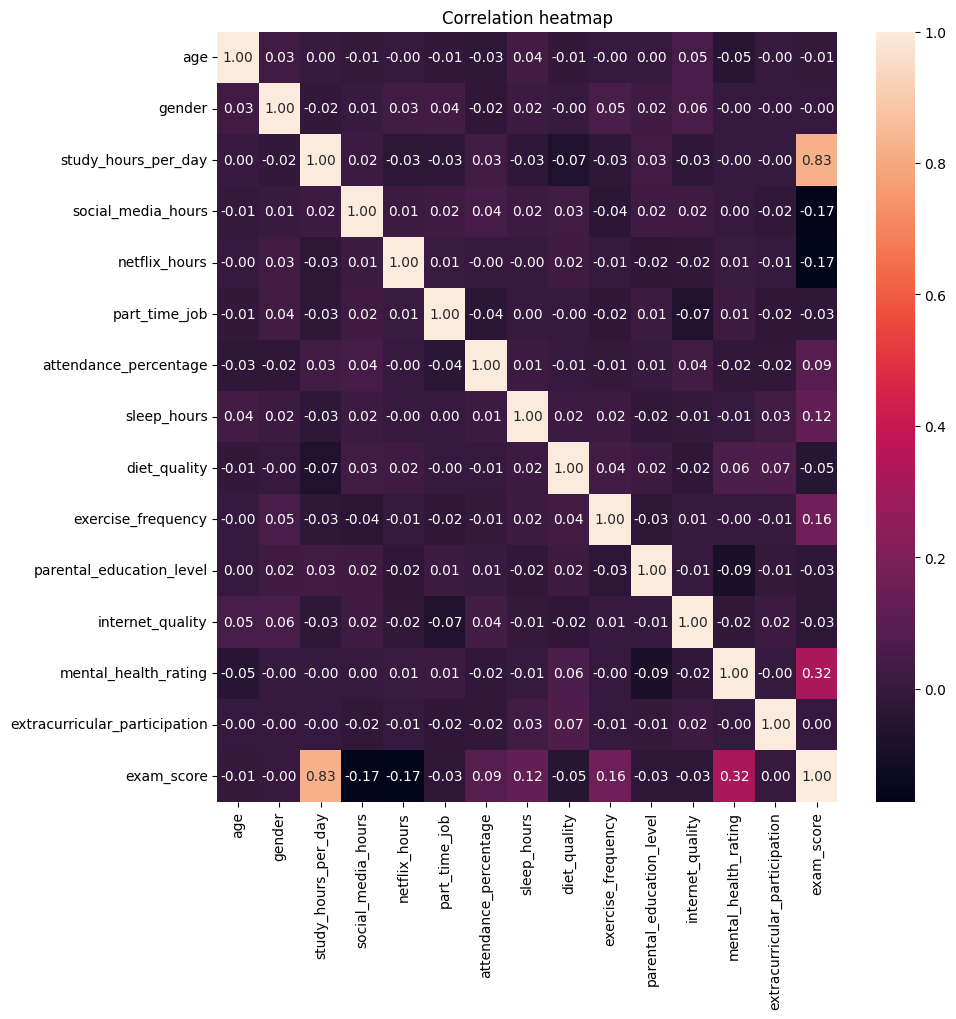

In [12]:


corr = df.drop('student_id', axis=1).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


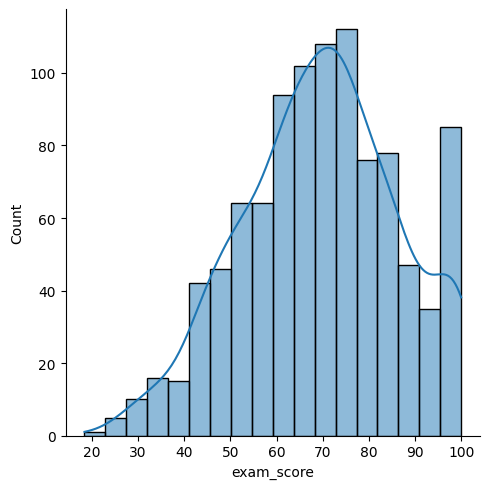

In [13]:
sns.displot(data=df, x='exam_score', kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


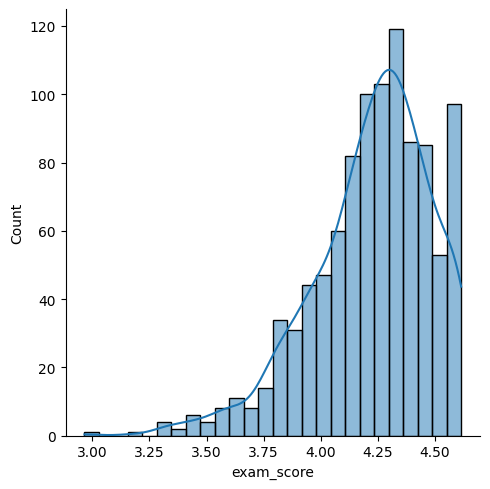

In [14]:
#applying natural lag to exam_score to lessen the skewness

df['exam_score'] = np.log1p(df['exam_score'])
sns.displot(data=df, x='exam_score', kde=True)

In [15]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [16]:
x= df.drop(['student_id', 'exam_score'], axis=1)
y = df['exam_score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [17]:
x_train.shape, y_train.shape

((670, 14), (670,))

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
#dataset preparation

train_data = lgb.Dataset(x_train, y_train)
test_data = lgb.Dataset(x_test, y_test, reference=train_data)

In [20]:
#lightgbm regression

params = {
    'objective': 'regression',
    'metrics': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves' : 13,
    'learning_rate': 0.05,
    'feature_fraction' : 0.8
}

num_rounds = 100

bst =lgb.train(params, train_data, num_rounds, valid_sets=[test_data])



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 14
[LightGBM] [Info] Start training from score 4.216766


In [21]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error


lgbmr = LGBMRegressor(metrics ='rmse')
lgbmr.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 14
[LightGBM] [Info] Start training from score 4.216766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(metrics='rmse')

In [22]:
y_pred= lgbmr.predict(x_test)

In [23]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  0.09087017166342849


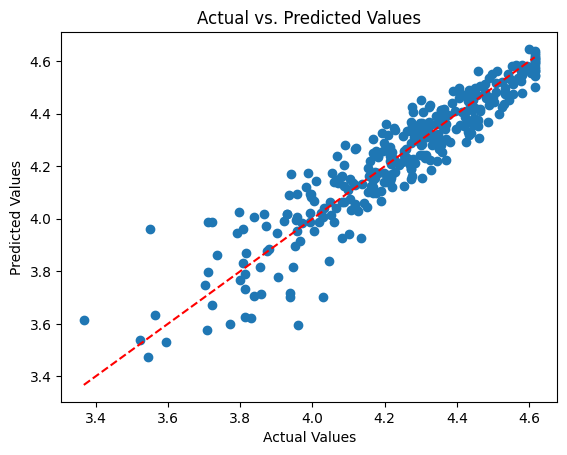

In [24]:
#checking how the model is performing

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Diagonal line
plt.show()